<a href="https://colab.research.google.com/github/cecilia-24/-proyecto_integrado_2./blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  armar ​​un dataframe de al menos 100 filas con datos aleatorios con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contiene las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Ciudadanía",
    "Arte", "Música", "Tecnología", "Economía"
]

# Función para generar datos aleatorios para una fila del DataFrame
def generar_fila():
  apellido = "Apellido" + str(random.randint(1,100))
  nombre = "Nombre" + str(random.randint(1,100))
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1,10)
  nota2 = random.randint(1,10)
  nota3 = random.randint(1,10)
  faltas = random.randint(0,20)

  return [apellido, nombre, dni, materia, nota1, nota2, nota3, faltas]

# Crear una lista de 100 filas con datos aleatorios
data = [generar_fila() for _ in range(100)]

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar",
                                 "Nota 1er Trimestre", "Nota 2do Trimestre",
                                 "Nota 3er Trimestre", "Faltas a clases"])
df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Apellido88,Nombre38,82161631,Física,9,3,7,15
1,Apellido98,Nombre10,70549827,Economía,5,3,9,16
2,Apellido12,Nombre41,21627382,Inglés,4,9,3,19
3,Apellido80,Nombre10,71204610,Ciudadanía,4,1,9,7
4,Apellido100,Nombre97,57413749,Historia,1,3,6,0
...,...,...,...,...,...,...,...,...
95,Apellido85,Nombre67,73300273,Arte,9,2,9,11
96,Apellido18,Nombre51,76851975,Educación Física,8,4,1,17
97,Apellido82,Nombre31,17012898,Inglés,2,2,8,0
98,Apellido60,Nombre13,21425545,Economía,10,6,4,9


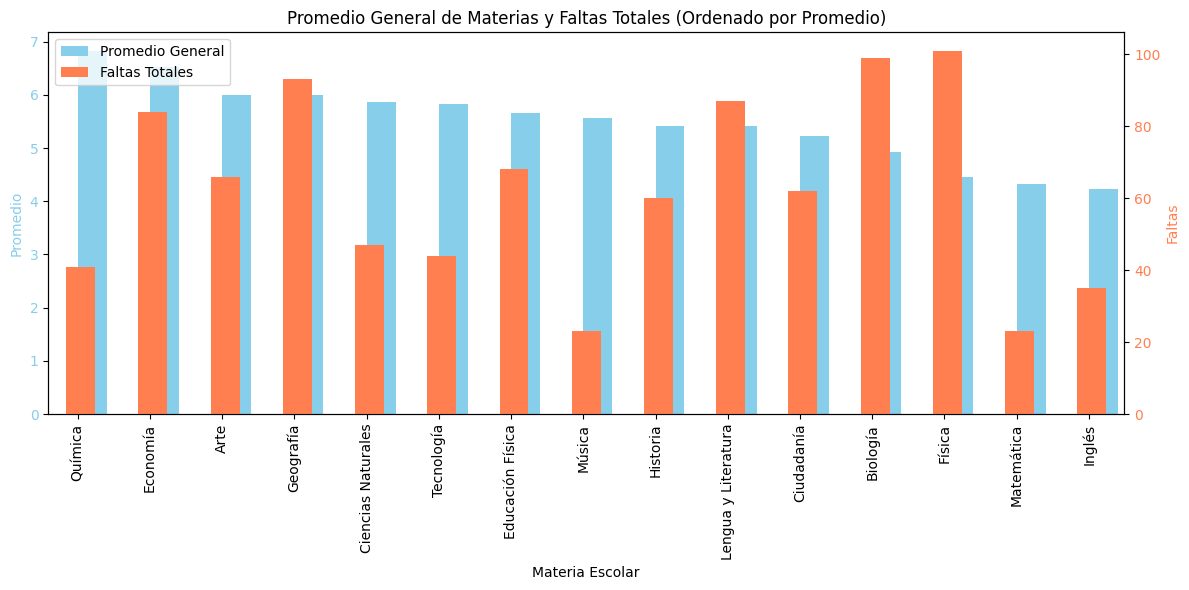

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contratable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby("Materia Escolar")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular las faltas totales por materia
faltas_por_materia = df.groupby("Materia Escolar")["Faltas a clases"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
promedios_ordenados.plot(kind="bar", ax=ax1, color="skyblue", position=0, width=0.4, label="Promedio General")
ax1.set_ylabel("Promedio", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")


ax2 = ax1.twinx()
faltas_por_materia[promedios_ordenados.index].plot(kind="bar", ax=ax2, color="coral", position=0.4, width=0.4, label="Faltas Totales")
ax2.set_ylabel("Faltas", color="coral")
ax2.tick_params(axis="y", labelcolor="coral")


plt.title("Promedio General de Materias y Faltas Totales (Ordenado por Promedio)")
plt.xlabel("Materia Escolar")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Agregar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)